In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [92]:

tetha_0= np.radians(10)
tetha_pun_0=0 #velocidad angular
L=1
y=L/2*np.cos(tetha_0) # centro de masa
g=9.81

y0 = [tetha_0, tetha_pun_0] 

In [115]:
def System(r,t,b):
    
    x,y,vx,vy = r
    
    dxdt = vx
    dydt = vy
    dvxdt = 0. - b*vx
    dvydt = - g - b*vy

    
    return [dxdt,dydt,dvxdt,dvydt]

In [127]:
def fun(y, t):
    
    tetha, tetha_pun = y


    tetha_pun_pun = ((2*(g/L)- ((tetha_pun)**2)*np.cos(tetha))*np.sin(tetha))/((1/3)+(np.sin(tetha))**2)
    
    return [tetha, tetha_pun,tetha_pun_pun]

In [135]:
def Integrator2(f,r0,t,b):
    
    h = t[1] - t[0]
    print(h)
    
    x = np.zeros_like(t)
    y = np.zeros_like(t)
    vx = np.zeros_like(t)
    vy = np.zeros_like(t)
    
    x[0] = r0[0]
    y[0] = r0[1]
    vx[0] = r0[2]
    vy[0] = r0[3]
    
    K1 = np.zeros(4)
    K2 = np.zeros(4)
    
    # Las pendientes instantaneas
    R = np.zeros(4)

    for i in range(1,len(t)):
        
        R = np.array([x[i-1],y[i-1],vx[i-1],vy[i-1]])
        
        K1 = f(R,t[i-1],b)
        
        R = np.array([x[i-1]+h*K1[0],y[i-1]+h*K1[1],vx[i-1]+h*K1[2],vy[i-1]+h*K1[3]])
        
        K2 = f(R,t[i-1]+h,b)
        
        x[i] = x[i-1] + 0.5*h*(K1[0]+K2[0])
        y[i] = y[i-1] + 0.5*h*(K1[1]+K2[1])
        
        vx[i] = vx[i-1] + 0.5*h*(K1[2]+K2[2])
        vy[i] = vy[i-1] + 0.5*h*(K1[3]+K2[3])
        



theta = np.radians(10)
r0 = [0.,10,20*np.cos(theta),20*np.sin(theta)]
x,y,vx,vy = Integrator2(fun,r0,t,2.)
0.01
r = integrate.odeint(f,r0,t,args=(2.,))
plt.plot(x,y)
plt.plot(r[:,0],r[:,1])

0.01001001001001001


TypeError: fun() takes 2 positional arguments but 3 were given

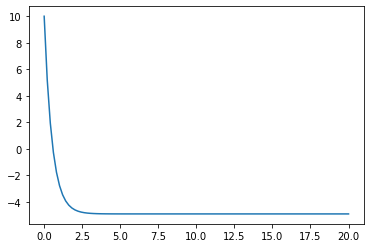

In [100]:
plt.plot(t,vy)

In [78]:
def Solucion(y):
    tetha, tetha_pun = y
    return ((2*(g/L)- ((tetha_pun)**2)*np.cos(tetha))*np.sin(tetha))/((1/3)+(np.sin(tetha))**2)

In [80]:
N = 100
t = np.linspace(0,20,N)

In [81]:
h = t[1] - t[0]

In [82]:
#solo la normal hace torque, si el angulo respecto al eje y entonces adentro del tablero es positivo

In [9]:
def GetEuler(x,y,h):
    
    for i in range(1,len(x)):
        
        k1 = f(x[i-1],y[i-1])
        y[i] = y[i-1] + h*k1


In [10]:
y1 = np.zeros_like(t)
y1[0] = 0

In [11]:
GetEuler(t,y1,h)

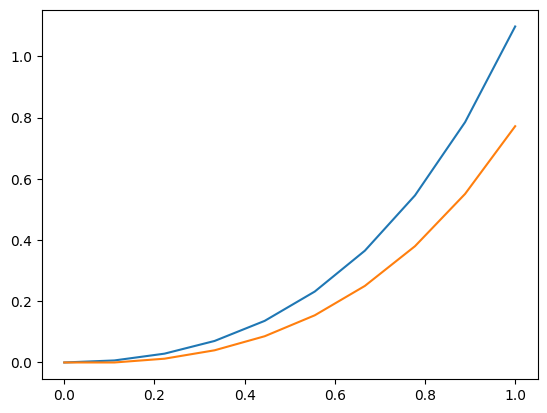

In [12]:
plt.plot(t,yext)
plt.plot(t,y1)

In [13]:
def fc(z):
    return 1j*z

In [14]:
def ComplexEuler():
    global theta
    global h_
    global f
    
    theta += h_
    f += h_*fc(f)

In [15]:
theta = 0.

N = 100
Vueltas = 1

h_ = Vueltas * 2*np.pi/N

f = 1

Solucion1 = np.array([theta,f])

for i in range(N):
    ComplexEuler()
    Solucion1 = np.vstack([Solucion1, np.array([theta,f])])

In [16]:
Solucion1[-1,1]

(1.2177068419842307-0.010044860504615213j)

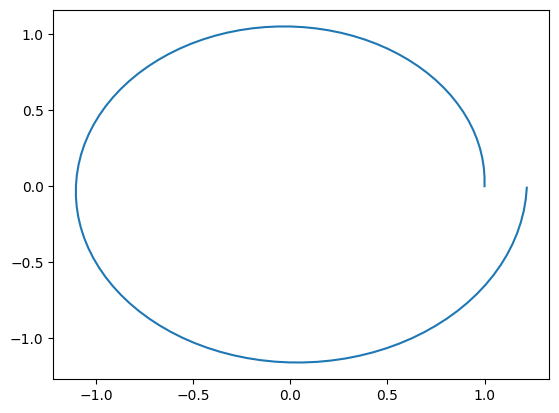

In [17]:
Re = np.real(Solucion1[:,1])
Im = np.imag(Solucion1[:,1])

plt.plot(Re,Im)

In [18]:
def GetEuler2(x,y,h):
    
    for i in range(1,len(x)):
        
        k1 = f(x[i-1],y[i-1])
        k2 = f(x[i-1]+h,y[i-1] + h*k1)
        
        y[i] = y[i-1] + 0.5*h*(k1+k2)

In [19]:
def f(x,y):
    return x + 2*y

In [20]:
y2 = np.zeros_like(t)
y2[0] = 0.

In [21]:
GetEuler2(t,y2,h)

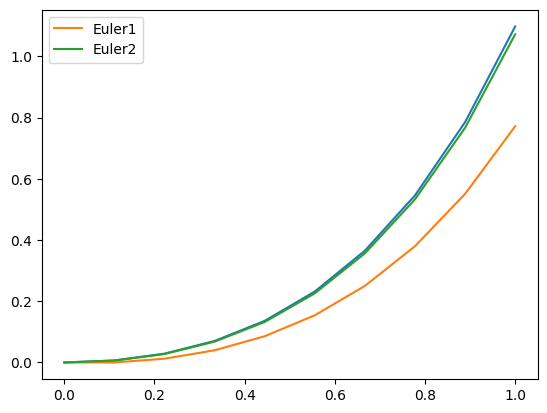

In [22]:
plt.plot(t,yext)
plt.plot(t,y1,label='Euler1')
plt.plot(t,y2,label='Euler2')
plt.legend()

In [23]:
def ComplexEuler2():
    global theta
    global h_
    global f
    
    theta += h_
    
    k1 = fc(f)
    k2 = fc(f+h_*k1)
    
    f += 0.5*h_*(k1+k2)

In [28]:
theta = 0.

N = 20
Vueltas = 1

h_ = Vueltas * 2*np.pi/N

f = 1

Solucion2 = np.array([theta,f])

for i in range(N):
    ComplexEuler2()
    Solucion2 = np.vstack([Solucion2, np.array([theta,f])])

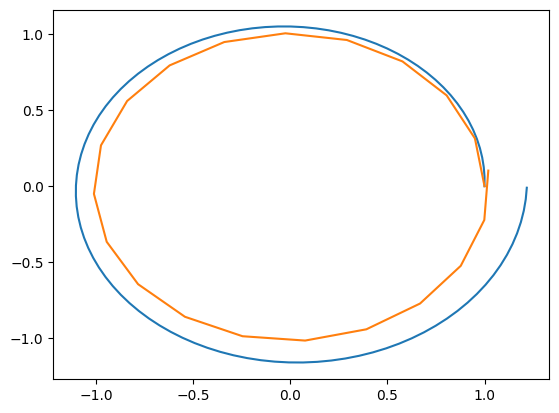

In [29]:
Re = np.real(Solucion1[:,1])
Im = np.imag(Solucion1[:,1])

Re2 = np.real(Solucion2[:,1])
Im2 = np.imag(Solucion2[:,1])


plt.plot(Re,Im)
plt.plot(Re2,Im2)

# Usando python scipy

In [30]:
def System(r,t,beta,gamma):
    
    dsdt = -beta*r[0]*r[1]
    didt =  beta*r[0]*r[1] - gamma*r[1]
    
    return [dsdt,didt]

In [31]:
t = np.linspace(0,30,100)

In [38]:
beta = 0.002
gamma = 0.5

In [39]:
r0 = [1000,1]
r = integrate.odeint( System, r0, t, args=(beta,gamma) )

# Implementacion Euler - Sistema de ecuaciones diferenciales

In [40]:
def f0(S,I,beta,gamma):
    return -beta*S*I

def f1(S,I,beta,gamma):
    return beta*S*I - gamma*I

In [47]:
def GetEulerSystem(f0,f1,r0,t):
    
    h = t[1] - t[0]
    
    S = np.zeros_like(t)
    I = np.zeros_like(t)
    
    # Initial condition
    S[0] =r0[0]
    I[0] =r0[1]
    
    # Vectorizacion de las pendientes
    K1 = np.zeros(2)
    
    for i in range(1,len(t)):
        
        K1[0] = f0(S[i-1],I[i-1],beta,gamma)
        K1[1] = f1(S[i-1],I[i-1],beta,gamma)
        
        S[i] = S[i-1] + h*K1[0]
        I[i] = I[i-1] + h*K1[1]
        
    return S,I

# Orden 2

In [48]:
def GetEuler2System(f0,f1,r0,t):
    
    h = t[1] - t[0]
    
    S = np.zeros_like(t)
    I = np.zeros_like(t)
    
    # Initial condition
    S[0] =r0[0]
    I[0] =r0[1]
    
    # Vectorizacion de las pendientes
    K1 = np.zeros(2)
    K2 = np.zeros(2)
    
    for i in range(1,len(t)):
        
        K1[0] = f0(S[i-1],I[i-1],beta,gamma)
        K1[1] = f1(S[i-1],I[i-1],beta,gamma)
        
        K2[0] = f0(S[i-1]+h*K1[0],I[i-1]+h*K1[1],beta,gamma)
        K2[1] = f1(S[i-1]+h*K1[0],I[i-1]+h*K1[1],beta,gamma)
        
        S[i] = S[i-1] + 0.5*h*(K1[0]+K2[0])
        I[i] = I[i-1] + 0.5*h*(K1[1]+K2[1])
        
    return S,I

In [50]:
S1,I1 = GetEulerSystem(f0,f1,r0,t)
S2,I2 = GetEuler2System(f0,f1,r0,t)

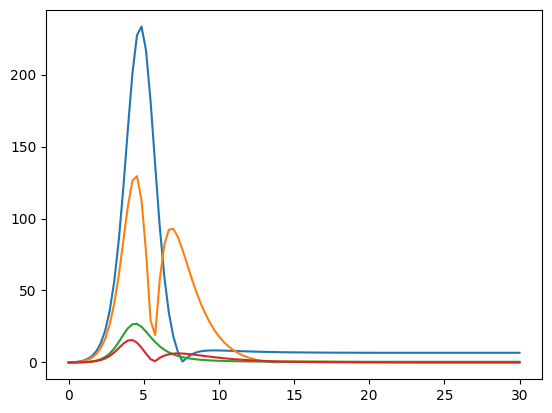

In [53]:
plt.plot(t,np.abs(r[:,0]-S1))
plt.plot(t,np.abs(r[:,1]-I1))
plt.plot(t,np.abs(r[:,0]-S2))
plt.plot(t,np.abs(r[:,1]-I2))

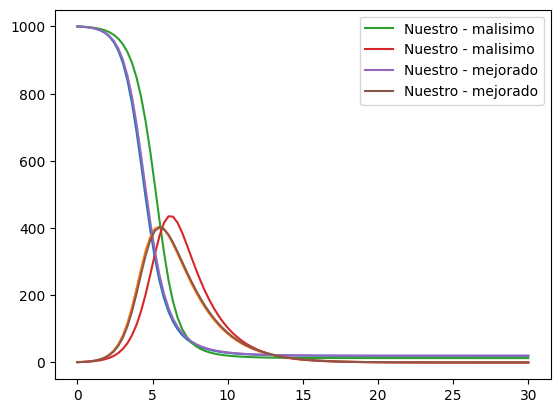

In [51]:
plt.plot(t,r[:,0])
plt.plot(t,r[:,1])
plt.plot(t,S1,label='Nuestro - malisimo')
plt.plot(t,I1,label='Nuestro - malisimo')
plt.plot(t,S2,label='Nuestro - mejorado')
plt.plot(t,I2,label='Nuestro - mejorado')
plt.legend()